<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Random_forest_Implement/Random_forest_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Implement

**Suppose:**

**Original dataset** = [1,2,3,4,5,6,7,8,9,10] (10 samples for simplicity)

Number of **models(estimators)** = 3



**Bootstrap sampling (with replacement)**:

* Model 1 randomly picks 10 samples → [3,7,1,7,9,2,2,5,8,3]
(notice some are repeated like 7,2,3, some are missing like 4,6,10)

* Model 2 randomly picks 10 samples → [1,4,4,6,2,9,5,8,10,10]
(different random set, again repeats allowed)

* Model 3 randomly picks 10 samples → [7,3,3,2,6,6,1,8,9,4]
(again different selection)

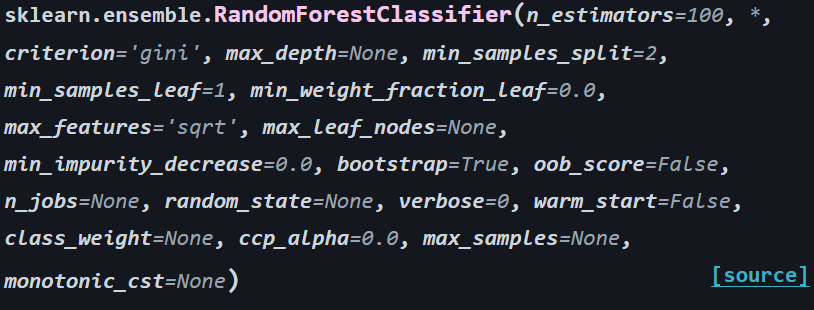



##  Key Hyperparameters of `RandomForestClassifier`

### 1. **n\_estimators**

* Number of trees in the forest.
* Default: `100`
* Higher = better performance (to a limit), but slower training.



### 2. **criterion**

* Function to measure the quality of a split.
* Options:

  * `"gini"` (default) → Gini impurity
  * `"entropy"` → Information gain
  * `"log_loss"` → Minimize log loss



### 3. **max\_depth**

* Maximum depth of each tree.
* Default: `None` (nodes expanded until all leaves are pure or min\_samples\_split is reached).
* Smaller values help prevent **overfitting**.



### 4. **min\_samples\_split**

* Minimum number of samples required to split an internal node.
* Default: `2`
* Larger values → more conservative tree (less overfitting).



### 5. **min\_samples\_leaf**

* Minimum number of samples required to be at a leaf node.
* Default: `1`
* Higher values smooth the model, prevent overfitting.



### 6. **max\_features**

* Number of features to consider when looking for the best split.
* Options:

  * `"sqrt"` (default for classifier → √features)
  * `"log2"`
  * `None` (all features)
  * Integer or float fraction



### 7. **bootstrap**

* Whether bootstrap samples are used when building trees.
* Default: `True`
* If `False`, the whole dataset is used to build each tree.



### 8. **oob\_score**

* Whether to use out-of-bag samples to estimate accuracy.
* Default: `False`
* Useful for validation without a separate test set.



### 9. **n\_jobs**

* Number of CPU cores to use.
* Default: `None` (1 core).
* `-1` → use all cores for faster training.



### 10. **random\_state**

* Controls randomness for reproducibility.
* Example: `random_state=42`



### 11. **class\_weight**

* Weights associated with classes.
* Options:

  * `None` (default → all classes have weight 1)
  * `"balanced"` → weights inversely proportional to class frequency.
  * Dict → custom weights `{0:0.3, 1:0.7}`



### 12. **max\_samples** (when `bootstrap=True`)

* Number of samples drawn from dataset to train each tree.
* Default: `None` (all samples with replacement).
* Can set fraction (e.g., `0.8`).


```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    criterion="gini",
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)
```


## What is GridSearchCV?

* GridSearchCV = Grid Search with Cross Validation

* It tests all possible combinations of hyperparameters you specify in a grid.

* Picks the best set based on a scoring metric (like accuracy, f1, etc.).

## What is RandomSearchCV

* RandomizedSearchCV is like GridSearchCV, but instead of trying every possible combination of hyperparameters (which can be very slow), it samples random combinations from the search space for a fixed number of iterations.

* This makes it much faster while still finding good hyperparameters.